# cesm Rainfall by Event Type

In [2]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
from utils.timePeriod import averageForTimePeriod

%run "utils/compound.ipynb"

In [3]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
def plotRainfallAnom(da):


    precContours=range(-250,250,50)

    cs=plt.contourf(da.lon, da.lat, da.values, precContours, transform=ccrs.PlateCarree(), cmap='RdBu')
    ax.coastlines(color='black')

    # Define gridline locations and draw the lines using cartopy's built-in gridliner:
    xticks = numpy.arange(-180, 190, 30)
    yticks = numpy.arange(-90, 100, 30)
    ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')


    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)
    cbar.set_label('Anomaly(mm/year)')

    ax.gridlines()


Import Events

In [75]:
firePos=xarray.open_dataarray('results/cesmFirePos.nc')

fireNeg=xarray.open_dataarray('results/cesmFireNeg.nc')

In [76]:
firePos

<xarray.DataArray (index: 8, experiment: 17, year: 1250)>
[170000 values with dtype=int64]
Coordinates:
  * index       (index) object 'nino34' 'dmi' 'sam' ... 'nino34+sam' 'dmi+sam'
  * year        (year) int64 850 851 852 853 854 ... 2095 2096 2097 2098 2099
  * experiment  (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']

And import warm season rainfall

In [7]:
rainfallDa = xarray.open_dataarray('results/cesmPrecipAnoms.nc')

# Plot mean rainfall for individual events

This one is a bit harder becuase I haven't calculated when its an individual but not compound event. Come back to this

In [74]:
firePos.sel(index='nino34', experiment='001').values

array([1, 0, 0, ..., 0, 0, 0])

# And again for compounds


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z

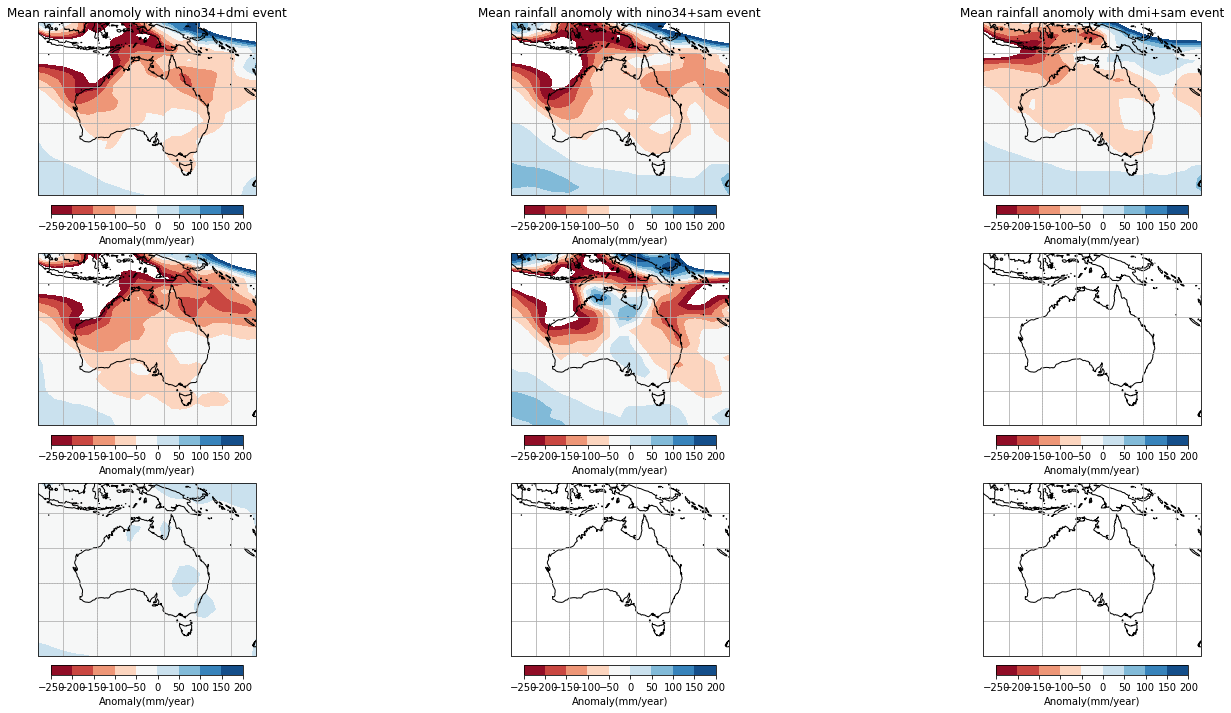

In [165]:
plt.figure(figsize=(24,12))


for iPair in range(0,len(firePos.pairs)):
    pair = firePos.pairs[iPair]
    ax=plt.subplot(3,3,iPair+1, projection=ccrs.Miller(central_longitude=120))

    toPlot=(
        rainfallDa.
        #sel(experiment =_model.cesmFullForcings.
        where(rainfallDa.year<1850).
        where(firePos.sel(index=pair)==True).
        mean(['year','experiment'])
    )

    plotRainfallAnom(toPlot)
    plt.ylabel('pre-1850')
    plt.title('Mean rainfall anomoly with ' + pair + ' event')
    
for iPair in range(0,len(firePos.pairs)):
    pair = firePos.pairs[iPair]
    ax=plt.subplot(3,3,iPair+4, projection=ccrs.Miller(central_longitude=120))

    toPlot=(
        rainfallDa.
        #sel(experiment =_model.cesmFullForcings.
        where((rainfallDa.year>1850) & (rainfallDa.year<2005)).
        where(firePos.sel(index=pair)==True).
        mean(['year','experiment'])
    )

    plotRainfallAnom(toPlot)
    plt.ylabel('1850-2005')

for iPair in range(0,len(firePos.pairs)):
    pair = firePos.pairs[iPair]
    ax=plt.subplot(3,3,iPair+7, projection=ccrs.Miller(central_longitude=120))

    toPlot=(
        rainfallDa.
        #sel(experiment =_model.cesmFullForcings.
        where(rainfallDa.year>=2005).
        where(firePos.sel(index=pair)==True).
        mean(['year','experiment'])
    )

    plotRainfallAnom(toPlot)
    plt.ylabel('post-2005')
    


In [38]:
firePos.sel

3

In [121]:
toPlot=rainfallDa.where(firePos==True).sel(index=pair, drop=True).mean('year')
   

In [122]:
toPlot.sel(experiment='002')

<xarray.DataArray 'precipAnom' (lat: 26, lon: 27)>
array([[ 6.47500344e+01,  7.07127584e+01,  7.13989532e+01,
         6.99453243e+01,  7.34294127e+01,  7.55553114e+01,
         7.74033596e+01,  7.95959941e+01,  7.43949882e+01,
         6.43931451e+01,  5.73505575e+01,  5.25037063e+01,
         4.88715164e+01,  4.41081600e+01,  4.63904493e+01,
         4.99356355e+01,  5.21634481e+01,  5.43416443e+01,
         5.63329369e+01,  4.71025023e+01,  3.84545338e+01,
         4.35507215e+01,  4.48761068e+01,  4.86397115e+01,
         7.16179228e+01,  8.73556853e+01,  8.82241847e+01],
       [ 9.78037438e+01,  9.21325383e+01,  8.75826976e+01,
         8.57218158e+01,  8.30184230e+01,  7.95022650e+01,
         7.71003665e+01,  6.81712956e+01,  5.99992923e+01,
         5.30082447e+01,  5.07899764e+01,  4.93838599e+01,
         4.70194627e+01,  4.61300508e+01,  4.61814089e+01,
         4.55540381e+01,  4.69119258e+01,  5.28653888e+01,
         5.43857169e+01,  4.96077915e+01,  4.80117488e+01,
         3.99025470e+01,  3.26723335e+01,  4.40890623e+01,
         6.75661286e+01,  9.17681336e+01,  1.05881068e+02],
       [ 9.22889568e+01,  8.47733574e+01,  8.09817968e+01,
         7.63710140e+01,  7.13745456e+01,  6.41328514e+01,
...
         5.81379302e+02,  6.85033226e+02,  7.33171469e+02,
         7.27604935e+02,  6.98799045e+02,  6.50799261e+02],
       [-4.08250119e+02, -2.08876444e+02, -2.23278513e+02,
        -1.99379629e+02, -1.84267317e+02, -1.65361568e+02,
        -2.53108220e+02, -2.30656707e+02, -2.66815072e+02,
        -2.67740948e+02, -2.50208251e+02, -2.49711194e+02,
        -2.62239442e+02, -2.07579602e+02, -7.05629965e+01,
         1.52273119e+01,  1.06328551e+02,  3.43612716e+02,
         5.18816335e+02,  6.48173361e+02,  7.45010459e+02,
         8.62554156e+02,  9.19263793e+02,  9.08560259e+02,
         8.30801022e+02,  7.21739129e+02,  6.05262478e+02],
       [-1.71706417e+02, -1.58016503e+02, -1.79020839e+02,
        -1.69539968e+02, -1.18907370e+02, -7.69775784e+01,
        -1.12145565e+02, -1.35814522e+02, -1.45956083e+02,
        -1.25492185e+02, -4.67629986e+01, -8.33307933e+00,
         2.38737895e+01,  7.12345387e+01,  1.89044757e+02,
         3.20913231e+02,  4.59644654e+02,  5.93101177e+02,
         7.13252778e+02,  8.01036794e+02,  8.90992686e+02,
         9.50256855e+02,  9.48861123e+02,  9.10810277e+02,
         8.11782197e+02,  6.78798124e+02,  5.51006643e+02]])
Coordinates:
    experiment  <U3 '002'
  * lat         (lat) float64 -48.32 -46.42 -44.53 ... -4.737 -2.842 -0.9474
  * lon         (lon) float64 102.5 105.0 107.5 110.0 ... 162.5 165.0 167.5

In [61]:
rainfallDa.experiment

<xarray.DataArray 'experiment' (experiment: 2)>
array(['002', 'LME.002'], dtype=object)
Coordinates:
  * experiment  (experiment) object '002' 'LME.002'